In [1]:
import plotly.express as px


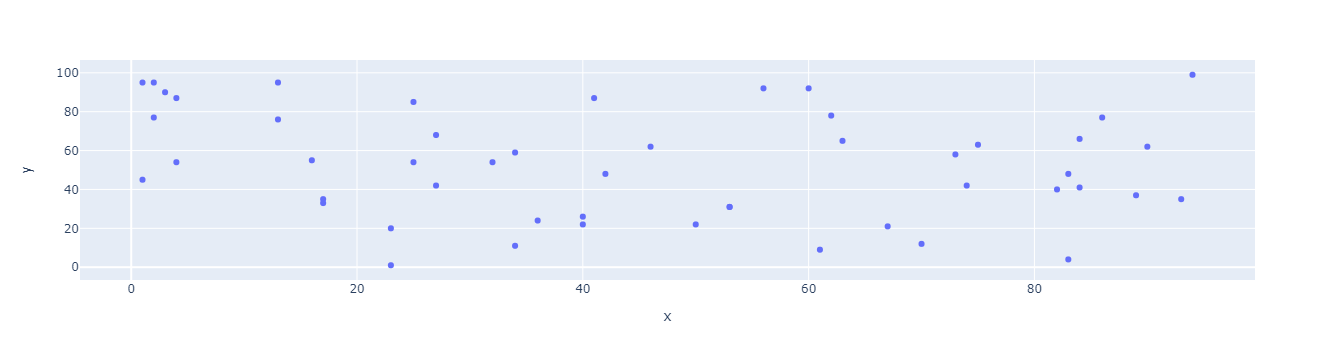

In [4]:
import plotly.express as px
import numpy as np
## set the seed to a random number obtained from /dev/urandom
## or its Windows analog, 
## or if neither of those is available, it will use the clock.
np.random.seed()
rand_x = np.random.randint(1,100,50)
rand_y = np.random.randint(1,100,50)
## trendline = 'ols' allow us to draw a trendline
fig = px.scatter(x = rand_x, y = rand_y, )
#fig.write_image(path + "figscat.png")
fig.show()

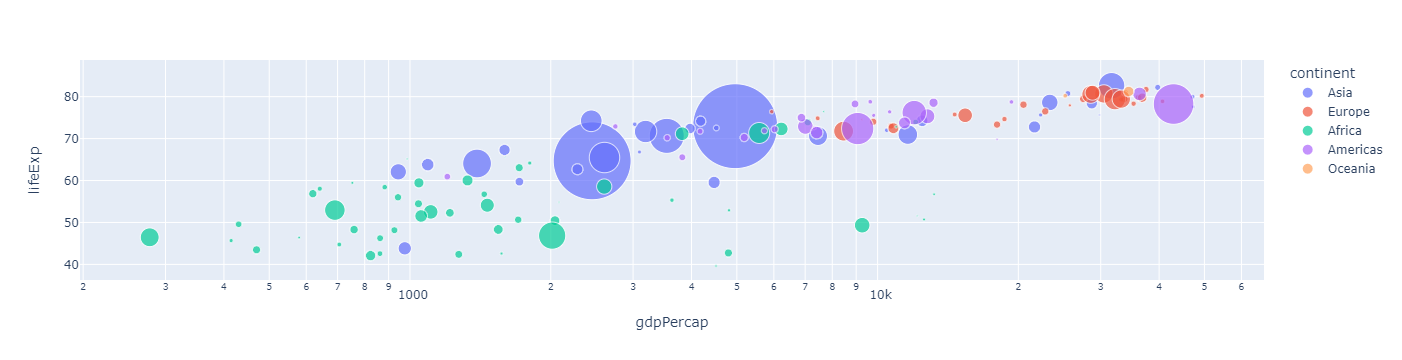

In [8]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp", size="pop", color="continent",
           hover_name="country", log_x=True, size_max=60)
fig.show()

In [7]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


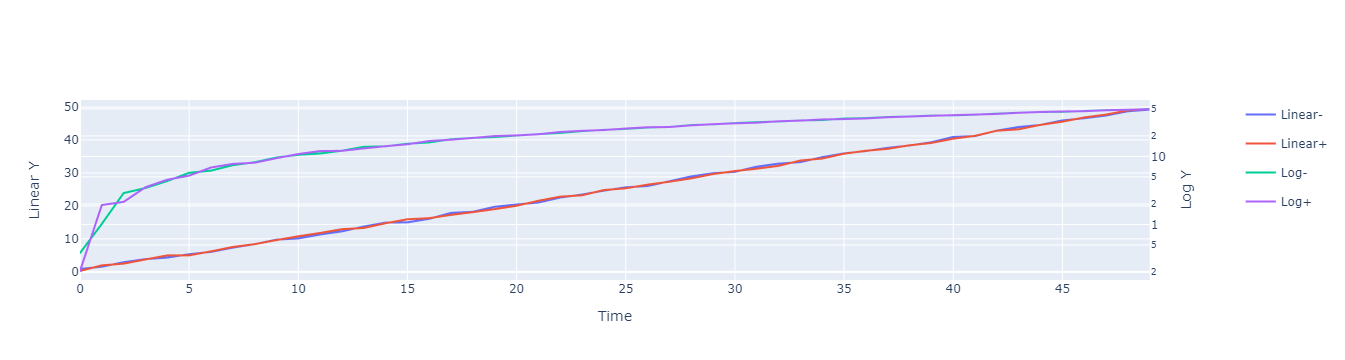

In [9]:
# import some stuff
import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np

# create some data
df = pd.DataFrame()
n = 50
df["Time"] = np.arange(n)
df["Linear-"] = np.arange(n)+np.random.rand(n)
df["Linear+"] = np.arange(n)+np.random.rand(n)
df["Log-"] = np.arange(n)+np.random.rand(n)
df["Log+"] = np.arange(n)+np.random.rand(n)
df.set_index("Time", inplace=True)

subfig = make_subplots(specs=[[{"secondary_y": True}]])

# create two independent figures with px.line each containing data from multiple columns
fig = px.line(df, y=df.filter(regex="Linear").columns, render_mode="webgl",)
fig2 = px.line(df, y=df.filter(regex="Log").columns, render_mode="webgl",)

fig2.update_traces(yaxis="y2")

subfig.add_traces(fig.data + fig2.data)
subfig.layout.xaxis.title="Time"
subfig.layout.yaxis.title="Linear Y"
subfig.layout.yaxis2.type="log"
subfig.layout.yaxis2.title="Log Y"
# recoloring is necessary otherwise lines from fig und fig2 would share each color
# e.g. Linear-, Log- = blue; Linear+, Log+ = red... we don't want this
subfig.for_each_trace(lambda t: t.update(line=dict(color=t.marker.color)))
subfig.show()

In [11]:
dfff = pd.DataFrame(
    {
        "A": [2,8,7,9,6],
        "B": ["F", "P", "P", "P", "P"],
        "C": [1,7,9,6,1],
        "D": ["F", "P", "P", "P", "F"],
    }
)
dfff

,A,B,C,D
0,2,F,1,F
1,8,P,7,P
2,7,P,9,P
3,9,P,6,P
4,6,P,1,F


In [12]:
((dfff['B']=='F')|(dfff['D']=='F')).astype('float')

0    1.0
1    0.0
2    0.0
3    0.0
4    1.0
dtype: float64

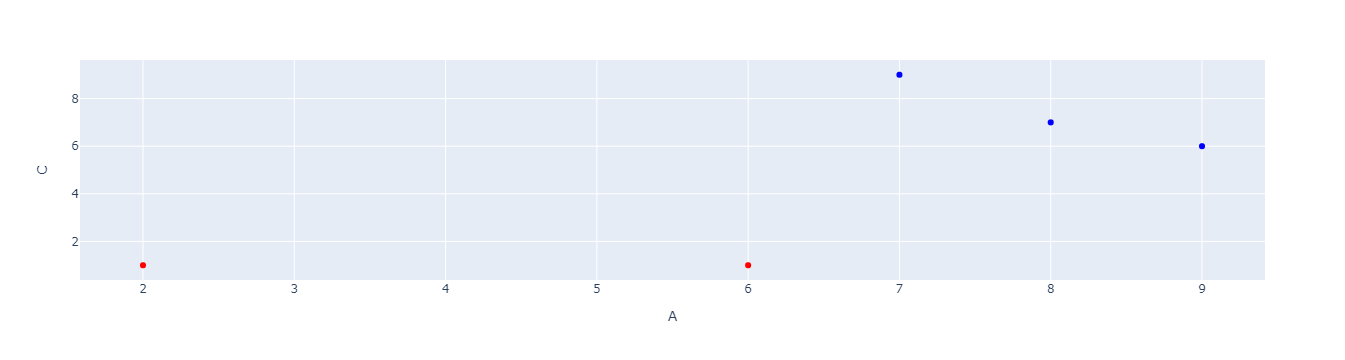

In [10]:
figg = px.scatter(dfff, x="A",y="C", hover_data=dfff.columns)
figg.update_traces(
    marker=dict(
        color=((dfff['B']=='F')|(dfff['D']=='F')).astype('float'),
        
        colorscale=[[0,'blue'],[1,'red']]
    )
)
figg.show()